In [141]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

In [142]:
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

In [143]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose()* error
    return weights

In [144]:
import logRegres

In [145]:
dataArr, labelMat = logRegres.loadDataSet()

In [146]:
logRegres.gradAscent(dataArr,labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [250]:
from numpy import *

def plotBestFit(dataArr):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-dataArr[0]-dataArr[1]*x)/dataArr[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

In [251]:
reload(logRegres)

<module 'logRegres' from 'logRegres.pyc'>

TypeError: bad operand type for unary -: 'list'

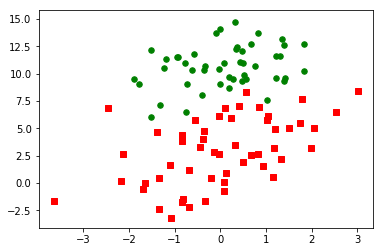

In [253]:
logRegres.plotBestFit(dataArr)

In [254]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

In [255]:
reload(logRegres)

<module 'logRegres' from 'logRegres.pyc'>

In [256]:
dataArr,labelMat=logRegres.loadDataSet()

In [257]:
weights=logRegres.stocGradAscent0(array(dataArr),labelMat)

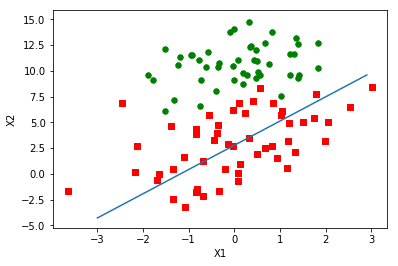

In [259]:
logRegres.plotBestFit(weights)

In [261]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter): 
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

In [262]:
reload(logRegres)

<module 'logRegres' from 'logRegres.pyc'>

In [271]:
dataArr,labelMat=logRegres.loadDataSet()

In [272]:
weights=logRegres.stocGradAscent1(array(dataArr),labelMat, 500)

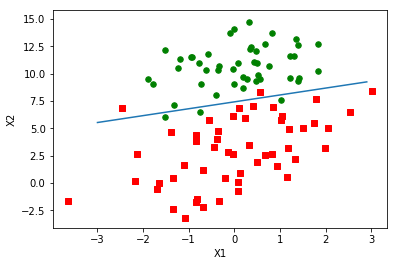

In [273]:
logRegres.plotBestFit(weights)

In [274]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: 
        return 0.0

In [275]:
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
            trainingSet.append(lineArr)
            trainingLabels.append(float(currLine[21]))
        trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
        errorCount = 0; numTestVec = 0.0
        for line in frTest.readlines():
            numTestVec += 1.0
            currLine = line.strip().split('\t')
            lineArr =[]
            for i in range(21):
                lineArr.append(float(currLine[i]))
            if int(classifyVector(array(lineArr), trainWeights))!=int(currLine[21]):
                errorCount += 1
        errorRate = (float(errorCount)/numTestVec)
        print "the error rate of this test is: %f" % errorRate
        return errorRate

In [276]:
def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print "after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests))

In [277]:
reload(logRegres)

<module 'logRegres' from 'logRegres.pyc'>

In [278]:
logRegres.multiTest()

logRegres.py:13: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+exp(-inX))


the error rate of this test is: 0.313433
the error rate of this test is: 0.238806
the error rate of this test is: 0.298507
the error rate of this test is: 0.253731
the error rate of this test is: 0.298507
the error rate of this test is: 0.238806
the error rate of this test is: 0.298507
the error rate of this test is: 0.641791
the error rate of this test is: 0.298507
the error rate of this test is: 0.223881
after 10 iterations the average error rate is: 0.310448


In [282]:
logRegres.colicTest()

the error rate of this test is: 0.283582


0.2835820895522388